In [61]:
# Imports
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_validate, learning_curve, train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, ExpSineSquared, RationalQuadratic, DotProduct, WhiteKernel, ConstantKernel as C

In [62]:
# Loading data
data=pd.read_csv('oktoberfest-food&beer_price.csv')

# Translating the column names to English
data.rename(columns=
            {'jahr':'year','dauer':'duration(in days)','besucher_gesamt':'total_visitors(in million)',
                     'besucher_tag':'visitor_day(in 1000)','bier_preis':'beer_price(per litres)',
                     'bier_konsum':'beer_consumption(per hectolitre)',
                     'hendl_preis':'chicken_price','hendl_konsum':'chicken_consumption'},
            inplace=True)

In [63]:
data.tail(5)

,year,duration(in days),total_visitors(in million),visitor_day(in 1000),beer_price(per litres),beer_consumption(per hectolitre),chicken_price,chicken_consumption
31,2016,17,5.6,329,10.57,66231,11.00,366876
32,2017,18,6.2,344,10.87,77836,11.41,466747
33,2018,16,6.3,394,11.30,78705,11.67,436492
34,2019,16,6.3,394,11.71,78502,12.15,434998
35,2022,17,5.7,335,13.45,71340,13.96,313636


- We notice that there is no data available for the years : 2020, 2021. This is because the Oktoberfest had to be cancelled because of COVID-19


In [64]:
# Descriptive statistics
data.describe()

,year,duration(in days),total_visitors(in million),visitor_day(in 1000),beer_price(per litres),beer_consumption(per hectolitre),chicken_price,chicken_consumption
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,2002.555556,16.305556,6.297222,386.694444,7.053333,62476.611111,7.768889,564746.138889
std,10.635371,0.624246,0.398200,27.429723,2.770215,10196.196093,2.793060,129222.529768
min,1985.000000,16.000000,5.500000,329.000000,3.200000,48698.000000,3.920000,313636.000000
25%,1993.750000,16.000000,5.975000,369.000000,4.845000,53510.750000,5.317500,481139.250000
50%,2002.500000,16.000000,6.350000,394.000000,6.750000,61467.500000,8.130000,515646.000000
75%,2011.250000,16.000000,6.500000,406.000000,9.170000,71085.000000,9.890000,685465.750000
max,2022.000000,18.000000,7.100000,444.000000,13.450000,79225.000000,13.960000,807710.000000


- The Oktoberfest which typically lasts for 16 days, on average attracts 6 million people every year.
- The price of beer which was only 3.2 euros in 1985 rose to a whopping 13.45 euros by 2022.
- We can observe a similar rise in price for the chicken from 3.9 euros in 1985 to 13.96 euros in 2022.
- On an average, 6.25 million litres of beer is consumed every year which is equivalent to having a river of beer flowing continuously for a day, filling the equivalent of nearly three Olympic-sized swimming pools. 

# Plots

## Beer Price over the years

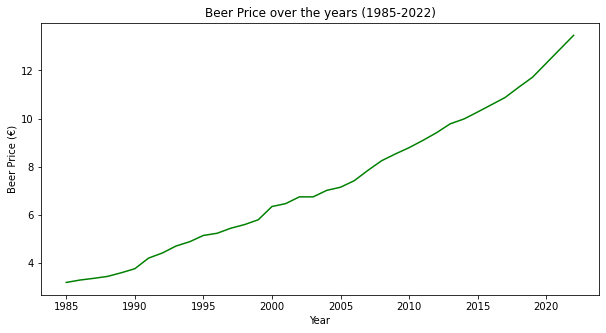

In [5]:
# How has the beer price changed over the years?

plt.figure(figsize=(10,5))
plt.plot(data['year'],data[['beer_price(per litres)']],color='green')
plt.xlabel('Year')
plt.ylabel('Beer Price (€)')
plt.title('Beer Price over the years (1985-2022)')
plt.show()

- The price for 1 litre of beer increased almost linearly since 1985.

## Did the increase in beer price have a negative influence on mean beer consumption per visitor?

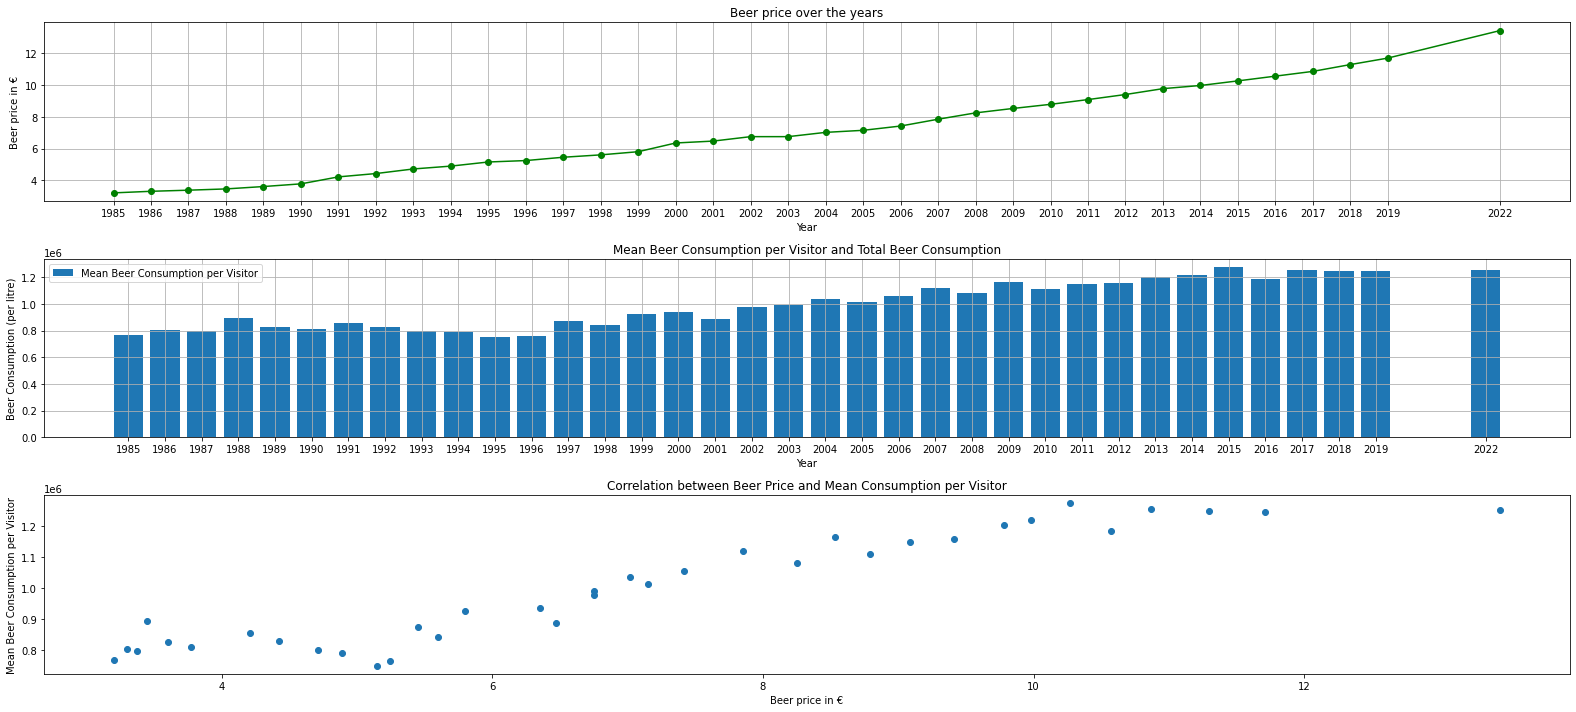

In [6]:
# Mean beer consumption per visitor (in litres)
data['mean_beer_consumption_per_visitor'] = (data['beer_consumption(per hectolitre)']/ data['total_visitors(in million)'])*100


fig, axes=plt.subplots(nrows=3,ncols=1,figsize=(22,10))

# beer price over the years
axes[0].plot(data['year'], data['beer_price(per litres)'], marker='o', label='Total Beer Consumption',color='green')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Beer price in €')
axes[0].set_title('Beer price over the years')
axes[0].grid(True,axis='both')
axes[0].set_xticks(data['year'])

# mean beer consumption per visitor
axes[1].bar(data['year'], data['mean_beer_consumption_per_visitor'], label='Mean Beer Consumption per Visitor')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Beer Consumption (per litre)')
axes[1].set_title('Mean Beer Consumption per Visitor and Total Beer Consumption')
axes[1].legend()
axes[1].grid(visible=True)
axes[1].set_xticks(data['year'])


#correlation between beer price and mean consumption per visitor
axes[2].scatter(data['beer_price(per litres)'],data['mean_beer_consumption_per_visitor'])
axes[2].set_xlabel('Beer price in €')
axes[2].set_ylabel('Mean Beer Consumption per Visitor')
axes[2].set_title('Correlation between Beer Price and Mean Consumption per Visitor')


plt.tight_layout()
plt.show()

- From the graphs, we can see that the increased price did not essentially have a negative influence on the mean consumption per visitor. Infact the scatter plot reveals a positive correlation between beer price and mean consumption per visitor.
- This can be attributted to quite a few factors:
  1. The growing popularity of the Oktoberfest, celebration of German culture and unparalled experience that many attendees are  willing to pay.
  2. Special brews and high quality beer.
  3. Tourists from different parts of the world attend the festival. Attendees from certain countries where beer is relatively more expensive find it reasonable to spend more.
 
Also, people aren't rational when they are drunk ;)

## Chicken prices over the years

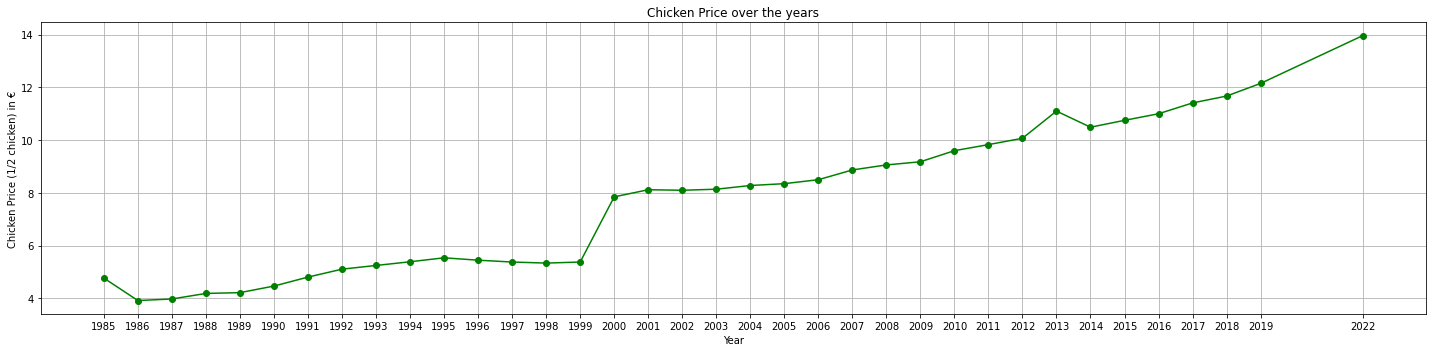

In [7]:
# How has the chicken price changed over the years?

plt.figure(figsize=(20,5))
plt.plot(data['year'],data[['chicken_price']],color='green', marker='o')
plt.xlabel('Year')
plt.ylabel('Chicken Price (1/2 chicken) in €')
plt.title('Chicken Price over the years')
plt.grid(True)
plt.xticks(data['year'])
plt.tight_layout()

- There was a huge price surge in the year 2000.
- In the year 2013 there seems to be a price outlier as compared to the steady increase before.

## Did the increase in chicken price have a negative influence on mean chicken consumption per visitor?

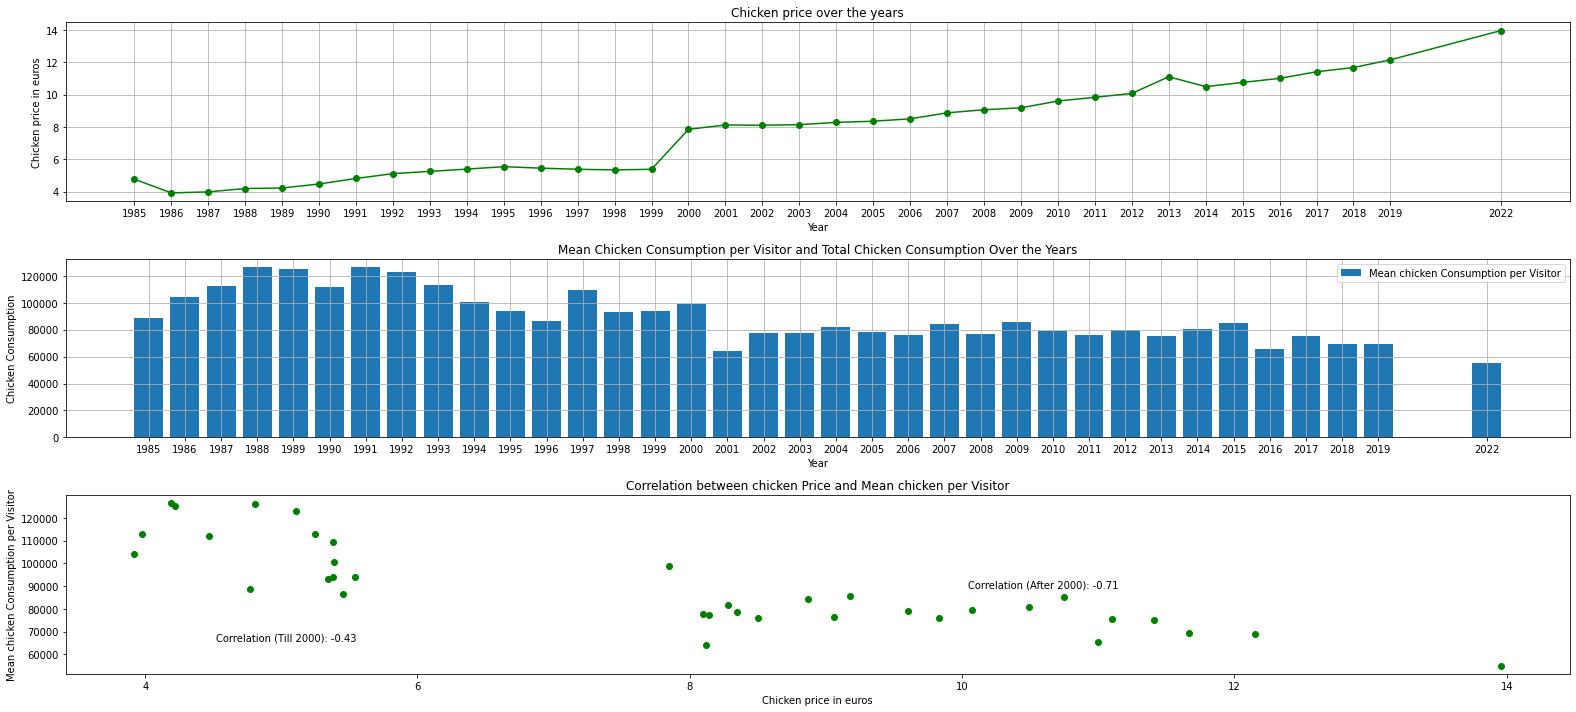

In [8]:
# mean beer consumption per visitor in litres
data['mean_chicken_consumption_per_visitor'] = (data['chicken_consumption']/ data['total_visitors(in million)'])


fig, axes=plt.subplots(nrows=3,ncols=1,figsize=(22,10))

# chicken price over the years
axes[0].plot(data['year'], data['chicken_price'], marker='o', label='Total Chicken Consumption',color='green')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Chicken price in euros')
axes[0].set_title('Chicken price over the years')
axes[0].grid(True,axis='both')
axes[0].set_xticks(data['year'])

# mean chicken consumption per visitor
axes[1].bar(data['year'], data['mean_chicken_consumption_per_visitor'], label='Mean chicken Consumption per Visitor')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Chicken Consumption')
axes[1].set_title('Mean Chicken Consumption per Visitor and Total Chicken Consumption Over the Years')
axes[1].legend()
axes[1].grid(visible=True)
axes[1].set_xticks(data['year'])

# correlation between chicken price and mean chicken per visitor
axes[2].scatter(data['chicken_price'],data['mean_chicken_consumption_per_visitor'],color='green')
axes[2].set_xlabel('Chicken price in euros')
axes[2].set_ylabel('Mean chicken Consumption per Visitor')
axes[2].set_title('Correlation between chicken Price and Mean chicken per Visitor')

correlation_coefficient_till_2000 = np.corrcoef(data['chicken_price'].iloc[0:16], data['mean_chicken_consumption_per_visitor'].iloc[0:16])[0, 1]
correlation_coefficient_after_2000 = np.corrcoef(data['chicken_price'].iloc[17:], data['mean_chicken_consumption_per_visitor'].iloc[17:])[0, 1]

axes[2].text(0.1, 0.2, f'Correlation (Till 2000): {correlation_coefficient_till_2000:.2f}', ha='left', va='center', transform=axes[2].transAxes)
axes[2].text(0.7, 0.5, f'Correlation (After 2000): {correlation_coefficient_after_2000:.2f}', ha='right', va='center', transform=axes[2].transAxes)

plt.tight_layout()
plt.show()

- The consumption stayed around the same level even though the price went up.
- The chicken prices increased significantly from the year 2001.
- The year 2013 seems to have a price outlier as compared to the previous steady increase.
- Price does seem to have an influence on the chicken consumption up to a specific point.
- The correlation coefficients are negative. In the first group (till 2000) the two variables are negatively correlated. After that the consumption perhaps hit price sensitivity which gives us an even stronger negative correlation.

# Model for Predicting Beer Price

Year: 2023

Duration (days): 18

Total visitors (in million): 7.2

Visitor day(in 1000): Total_visitors (in million)/Duration (days): 400

Beer price(per litre): 14.33

Beer consumption(per hectolitre): 65000

Chicken price(1/2 chicken): 16.49

Chicken Consumption: 488000


- Additional visitor and consumption data for 2023 was retrieved from: 

https://www.muenchen.de/veranstaltungen/oktoberfest/aktuell/wiesn-2023-das-ist-die-abschlussbilanz

- The beer price for 2023 was calculated as the average across the "Festhallen" from this table: 

https://stadt.muenchen.de/dam/jcr:2117b3fe-760c-4a9d-8123-38fe54bf49e4/ge-trraenke-wiesn23.pdf. This matches with the way data for previous years was recorded (From the Oktoberfest dataset description: "Die durchschnittlichen Bierpreise für 1 Maß Bier (1 Liter) in den Festzelten auf dem Oktoberfest (Preise in Euro)")

- The chicken price for 2023 was calculated as an average across "Festhallen" retrieved from:

https://oktoberfest-guide.com/tents/menus-food-drinks/



## Exploring Linear Regression model

In [9]:
# Training data
X_beer = data.drop(columns=['beer_price(per litres)', 'mean_beer_consumption_per_visitor', 'mean_chicken_consumption_per_visitor'])
y_beer = data['beer_price(per litres)']

In [43]:
# Your code that produces warnings

# Oktoberfest data for the year 2023
X_test = [[2023, 18, 7.2, 400, 65000, 16.49, 488000]]

# Create a polynomial regression model
degree = 1
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model 
polyreg.fit(X_beer, y_beer)

# Predict beer price for the test data
y_pred = polyreg.predict(X_test)
print(f'Predicted Beer Price for 2023: {y_pred[0]:.2f}')

Predicted Beer Price for 2023: 14.29


- We observe that the beer price(per litre) predicted by the linear regression model for 2023 is close to the ground truth value.

Next, we aim to assess whether increasing the polynomial degree contributes to a more optimal fit.

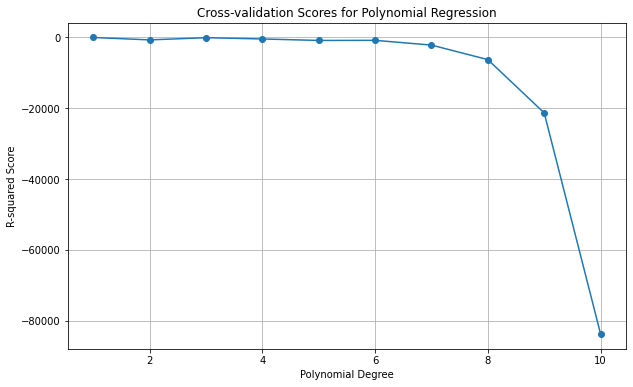

Best Polynomial Degree: 1


In [46]:
# To find the optimal number of degrees
degrees = np.arange(1, 11)

cv_scores = []

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X_beer)

    model = LinearRegression()
    cv_score = np.mean(cross_val_score(model, X_poly, y_beer, cv=5, scoring='r2'))
    cv_scores.append(cv_score)

# Plot the cross-validation scores for each degree
plt.figure(figsize=(10, 6))
plt.plot(degrees, cv_scores, marker='o')
plt.title('Cross-validation Scores for Polynomial Regression')
plt.xlabel('Polynomial Degree')
plt.ylabel('R-squared Score')
plt.grid(True)
plt.show()

# Determine the degree with the highest cross-validation score
best_degree = degrees[np.argmax(cv_scores)]
print(f"Best Polynomial Degree: {best_degree}")

# Fit the final model with the best degree
poly_features = PolynomialFeatures(degree=best_degree)
X_poly = poly_features.fit_transform(X_beer)

final_model = LinearRegression()
final_model.fit(X_poly, y_beer)

# Plot the regression curve
x_range = np.linspace(X_beer.min().min(), X_beer.max().max(), 100).reshape(-1, 1)
x_range_poly = poly_features.transform(X_beer)
y_pred = final_model.predict(x_range_poly)


## Exploring Gaussian Regression model

In [48]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_beer, y_beer, test_size=0.2, random_state=42)

# List of kernels to explore
kernels_to_explore = [
    C(1.0, (1e-3, 1e3)) * DotProduct(sigma_0=1.0), 
    C(1.0, (1e-3, 1e3)) * DotProduct(sigma_0=1.0) ** 2,
    C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2)) * DotProduct(sigma_0=1.0),
    C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2)) + DotProduct(sigma_0=1.0),

]

# Fit and evaluate models for each kernel
for kernel in kernels_to_explore:
    try:
        gpr_beer = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=50, alpha=0.1, normalize_y=True)
        # Fit the model
        gpr_beer.fit(X_train, y_train)

        # 2023 data
        X_test = np.array([[2023, 18, 7.2, 400, 65000, 16.49, 488000]])

        # Predict mean and standard deviation of the GP at test points
        beer_price_pred, beer_price_std = gpr_beer.predict(X_test, return_std=True)

        # Print the kernel type and predicted mean and standard deviation of beer price
        print(f'Kernel Type: {str(kernel)}')
        print(f'Predicted beer price for 2023: {beer_price_pred[0]} ± {beer_price_std[0]}\n')

    except Exception as e:
        print(f"Error with kernel {str(kernel)}: {e}")


Kernel Type: 1**2 * DotProduct(sigma_0=1)
Predicted beer price for 2023: 10.16955606072782 ± 1.0140688091279406

Error with kernel 1**2 * DotProduct(sigma_0=1) ** 2: ("The kernel, 1**2 * DotProduct(sigma_0=1) ** 2, is not returning a positive definite matrix. Try gradually increasing the 'alpha' parameter of your GaussianProcessRegressor estimator.", '14-th leading minor of the array is not positive definite')
Kernel Type: 1**2 * RBF(length_scale=1) * DotProduct(sigma_0=1)
Predicted beer price for 2023: 6.628571428571428 ± 40619.06797242386

Kernel Type: 1**2 * RBF(length_scale=1) + DotProduct(sigma_0=1)
Predicted beer price for 2023: 13.136455221783388 ± 2.521787530089294



- Using Kernel Type: 1**2 * RBF(length_scale=1) + DotProduct(sigma_0=1): 

The projected beer price for 2023 is estimated to be 13.13, with an uncertainty range of approximately ± 2.52.

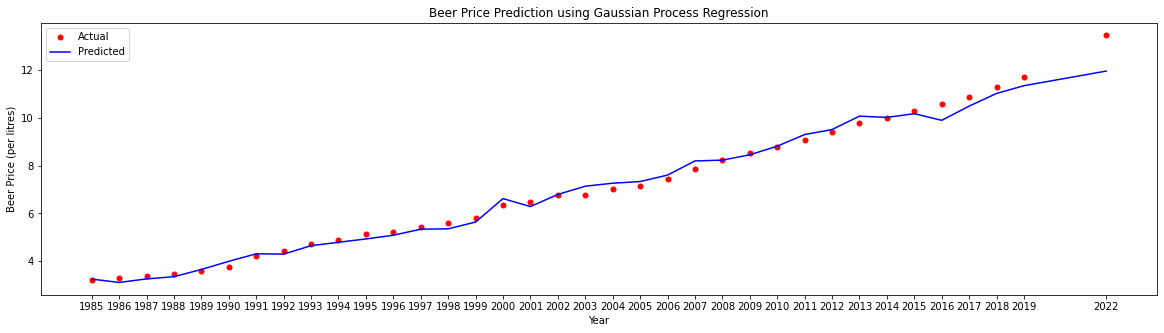

In [49]:
# Generate predictions for all years
beer_price_all_pred, _ = gpr_beer.predict(X_beer, return_std=True)


# Plotting beer price
plt.figure(figsize=(20, 5))
plt.plot(data['year'], data['beer_price(per litres)'], 'r.', markersize=10, label='Actual')
plt.plot(data['year'], beer_price_all_pred, 'b-', label='Predicted')
plt.xlabel('Year')
plt.ylabel('Beer Price (per litres)')
plt.xticks(data['year'])
plt.legend()

plt.title('Beer Price Prediction using Gaussian Process Regression')
plt.show()

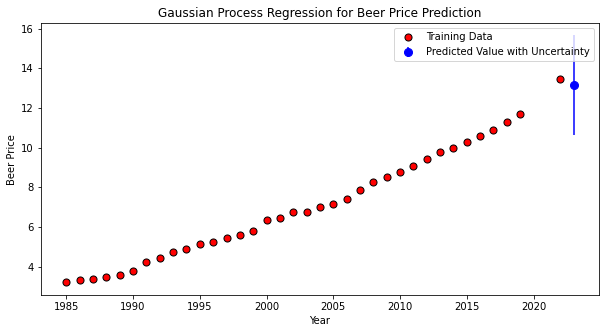

In [50]:
# Visualize model predictions for beer price
plt.figure(figsize=(10, 5))
plt.scatter(data['year'], data['beer_price(per litres)'], c='r', s=50, zorder=10, edgecolors=(0, 0, 0), label='Training Data')
plt.errorbar(X_test[0][0], beer_price_pred, yerr=beer_price_std, fmt='o', color='b', markersize=8, label='Predicted Value with Uncertainty')
plt.xlabel('Year')
plt.ylabel('Beer Price')
plt.title('Gaussian Process Regression for Beer Price Prediction')
plt.legend()
plt.show()

- Since the beer prices predominantly exhibit a linear relationship, for simplicity,  interpretability, and computational efficiency, the linear regression model would be a pragmatic choice.

# Model for Predicting Chicken Price

## Exploring Linear Regression model

In [51]:
# Oktoberfest data for the year 2023
X_chicken_test = [[2023, 18, 7.2, 400, 14.33, 65000, 488000]]
chicken_price= 16.49 

In [52]:
# Training data
X_chicken = data.drop(columns=['chicken_price', 'mean_beer_consumption_per_visitor', 'mean_chicken_consumption_per_visitor'])
y_chicken = data['chicken_price']

In [56]:
# Create a polynomial regression model
degree = 1
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model 
polyreg.fit(X_chicken, y_chicken)

# Predict beer price for the test data
y_chicken_pred = polyreg.predict(X_chicken_test)
print(f'Predicted Chicken Price for 2023: {y_chicken_pred[0]:.2f}')

Predicted Chicken Price for 2023: 13.82


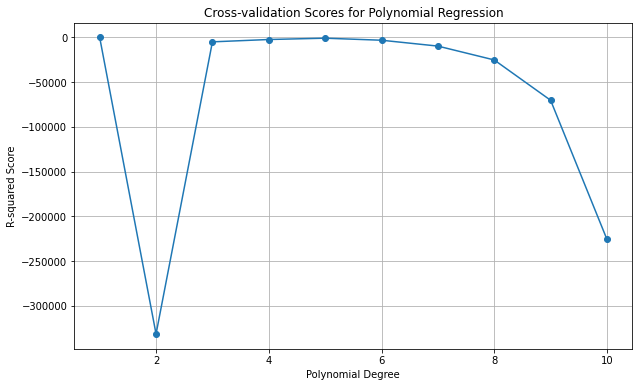

Best Polynomial Degree: 1


In [55]:
# To find the optimal number of degrees
degrees = np.arange(1, 11)

cv_scores = []

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X_chicken)

    model = LinearRegression()
    cv_score = np.mean(cross_val_score(model, X_poly, y_chicken, cv=5, scoring='r2'))
    cv_scores.append(cv_score)

# Plot the cross-validation scores for each degree
plt.figure(figsize=(10, 6))
plt.plot(degrees, cv_scores, marker='o')
plt.title('Cross-validation Scores for Polynomial Regression')
plt.xlabel('Polynomial Degree')
plt.ylabel('R-squared Score')
plt.grid(True)
plt.show()

# Determine the degree with the highest cross-validation score
best_degree = degrees[np.argmax(cv_scores)]
print(f"Best Polynomial Degree: {best_degree}")

# Fit the final model with the best degree
poly_features = PolynomialFeatures(degree=best_degree)
X_poly = poly_features.fit_transform(X_chicken)

final_model = LinearRegression()
final_model.fit(X_poly, y_chicken)

# Plot the regression curve
x_range = np.linspace(X_chicken.min().min(), X_chicken.max().max(), 100).reshape(-1, 1)
x_range_poly = poly_features.transform(X_chicken)
y_chicken_pred = final_model.predict(x_range_poly)


- We observe that the Linear Regression model produces a significantly different result from the ground truth value.

## Exploring Gaussian Process Regression

In [57]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_chicken, y_chicken, test_size=0.2, random_state=42)

# List of kernels to explore
kernels_to_explore = [
    C(1.0, (1e-3, 1e3)) * DotProduct(sigma_0=1.0), 
    C(1.0, (1e-3, 1e3)) * DotProduct(sigma_0=1.0) ** 2,
    C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2)) * DotProduct(sigma_0=1.0),
    C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2)) + DotProduct(sigma_0=1.0),

]

# Fit and evaluate models for each kernel
for kernel in kernels_to_explore:
    try:
        gpr_chicken = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=50, alpha=0.1, normalize_y=True)
        # Fit the model
        gpr_chicken.fit(X_train, y_train)

        # 2023 data
        X_chicken_test = [[2023, 18, 7.2, 400, 14.33, 65000, 488000]]

        # Predict mean and standard deviation of the GP at test points
        chicken_price_pred, chicken_price_std = gpr_chicken.predict(X_chicken_test, return_std=True)

        # Print the kernel type and predicted mean and standard deviation of beer price
        print(f'Kernel Type: {str(kernel)}')
        print(f'Predicted chicken price for 2023: {chicken_price_pred[0]} ± {chicken_price_std[0]}\n')

    except Exception as e:
        print(f"Error with kernel {str(kernel)}: {e}")


Kernel Type: 1**2 * DotProduct(sigma_0=1)
Predicted chicken price for 2023: 9.771319944378734 ± 0.8628198598677947

Error with kernel 1**2 * DotProduct(sigma_0=1) ** 2: ("The kernel, 1**2 * DotProduct(sigma_0=1) ** 2, is not returning a positive definite matrix. Try gradually increasing the 'alpha' parameter of your GaussianProcessRegressor estimator.", '14-th leading minor of the array is not positive definite')
Kernel Type: 1**2 * RBF(length_scale=1) * DotProduct(sigma_0=1)
Predicted chicken price for 2023: 7.385714285714286 ± 41059.57254137133

Kernel Type: 1**2 * RBF(length_scale=1) + DotProduct(sigma_0=1)
Predicted chicken price for 2023: 13.08475977312902 ± 1.9588369004083892



- Using Kernel Type: 1**2 * RBF(length_scale=1) + DotProduct(sigma_0=1): 

The projected chicken price for 2023 is estimated to be 13.08, with an uncertainty range of approximately ± 1.96.

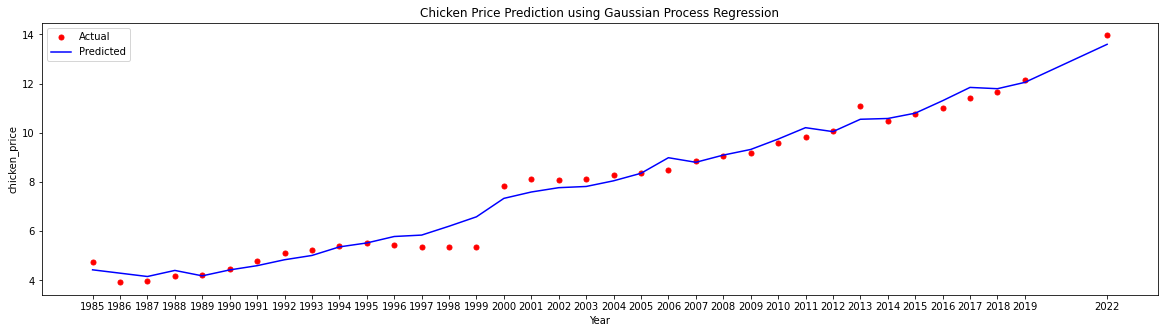

In [58]:
# Generate predictions for all years
chicken_price_all_pred, _ = gpr_chicken.predict(X_chicken, return_std=True)


# Plotting beer price
plt.figure(figsize=(20, 5))
plt.plot(data['year'], data['chicken_price'], 'r.', markersize=10, label='Actual')
plt.plot(data['year'], chicken_price_all_pred, 'b-', label='Predicted')
plt.xlabel('Year')
plt.ylabel('chicken_price')
plt.xticks(data['year'])
plt.legend()

plt.title('Chicken Price Prediction using Gaussian Process Regression')
plt.show()

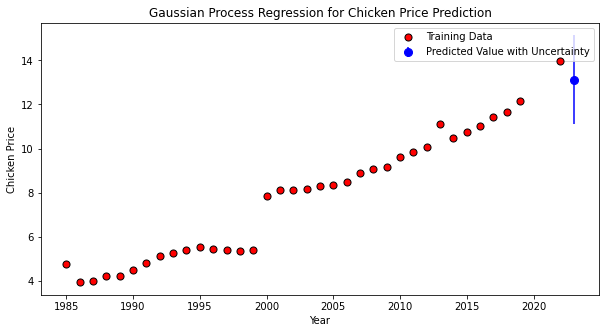

In [26]:
# Visualize model predictions for chicken price
plt.figure(figsize=(10, 5))
plt.scatter(data['year'], data['chicken_price'], c='r', s=50, zorder=10, edgecolors=(0, 0, 0), label='Training Data')
plt.errorbar(X_chicken_test[0][0], chicken_price_pred, yerr=chicken_price_std, fmt='o', color='b', markersize=8, label='Predicted Value with Uncertainty')
plt.xlabel('Year')
plt.ylabel('Chicken Price')
plt.title('Gaussian Process Regression for Chicken Price Prediction')
plt.legend()
plt.show()